# TEST Notebook

In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import geopandas as gpd
from streamlit_folium import st_folium
from shapely.ops import nearest_points
import folium
from folium.features import GeoJsonTooltip
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('../data/communes-20220101-shp/')
gdf.head()

insee           nom        wikipedia  surf_ha  \
0  2B222  Pie-d'Orezza  fr:Pie-d'Orezza    573.0   
1  2B137          Lano          fr:Lano    824.0   
2  2B051        Cambia        fr:Cambia    833.0   
3  2B106         Érone         fr:Érone    393.0   
4  2B185        Oletta        fr:Oletta   2674.0   

                                            geometry  
0  POLYGON ((9.32017 42.38507, 9.32028 42.38510, ...  
1  POLYGON ((9.20010 42.39013, 9.20014 42.39014, ...  
2  POLYGON ((9.27757 42.37509, 9.27758 42.37512, ...  
3  POLYGON ((9.25119 42.37605, 9.25132 42.37603, ...  
4  POLYGON ((9.28340 42.66273, 9.28345 42.66273, ...

In [3]:
folder_path = "../data/cog_ensemble_2021_csv/"
df_commune = pd.read_csv(folder_path + "commune2021.csv")
df_commune.head()

TYPECOM    COM   REG DEP CTCD  ARR  TNCC                    NCC  \
0     COM  01001  84.0  01  01D  012     5  ABERGEMENT CLEMENCIAT   
1     COM  01002  84.0  01  01D  011     5    ABERGEMENT DE VAREY   
2     COM  01004  84.0  01  01D  011     1      AMBERIEU EN BUGEY   
3     COM  01005  84.0  01  01D  012     1    AMBERIEUX EN DOMBES   
4     COM  01006  84.0  01  01D  011     1                AMBLEON   

                  NCCENR                  LIBELLE   CAN  COMPARENT  
0  Abergement-Clémenciat  L'Abergement-Clémenciat  0108        NaN  
1    Abergement-de-Varey    L'Abergement-de-Varey  0101        NaN  
2      Ambérieu-en-Bugey        Ambérieu-en-Bugey  0101        NaN  
3    Ambérieux-en-Dombes      Ambérieux-en-Dombes  0122        NaN  
4                Ambléon                  Ambléon  0104        NaN

In [4]:
# Assuming you have already read the shape file into a GeoDataFrame called 'gdf' and the CSV into a DataFrame called 'df_commune'

# Convert the 'insee' and 'COM' columns to strings if they are not already
gdf['insee'] = gdf['insee'].astype(str)
df_commune['COM'] = df_commune['COM'].astype(str)

# Merge the GeoDataFrame with the DataFrame on the 'insee' and 'COM' columns
merged_gdf = gdf.merge(df_commune, left_on='insee', right_on='COM')

# The 'DEP' column from df_commune will now be in the merged_gdf, giving you the department for each commune
merged_gdf.head()

insee           nom        wikipedia  surf_ha  \
0  2B222  Pie-d'Orezza  fr:Pie-d'Orezza    573.0   
1  2B137          Lano          fr:Lano    824.0   
2  2B051        Cambia        fr:Cambia    833.0   
3  2B106         Érone         fr:Érone    393.0   
4  2B185        Oletta        fr:Oletta   2674.0   

                                            geometry TYPECOM    COM   REG DEP  \
0  POLYGON ((9.32017 42.38507, 9.32028 42.38510, ...     COM  2B222  94.0  2B   
1  POLYGON ((9.20010 42.39013, 9.20014 42.39014, ...     COM  2B137  94.0  2B   
2  POLYGON ((9.27757 42.37509, 9.27758 42.37512, ...     COM  2B051  94.0  2B   
3  POLYGON ((9.25119 42.37605, 9.25132 42.37603, ...     COM  2B106  94.0  2B   
4  POLYGON ((9.28340 42.66273, 9.28345 42.66273, ...     COM  2B185  94.0  2B   

  CTCD  ARR  TNCC           NCC        NCCENR       LIBELLE   CAN  COMPARENT  
0  20R  2B3     0  PIE D OREZZA  Pie-d'Orezza  Pie-d'Orezza  2B10        NaN  
1  20R  2B3     0          LANO          Lano          Lano  2B14        NaN  
2  20R  2B3     0        CAMBIA        Cambia        Cambia  2B14        NaN  
3  20R  2B3     1         ERONE         Érone         Érone  2B14        NaN  
4  20R  2B5     1        OLETTA        Oletta        Oletta  2B05        NaN

In [5]:
condition = (merged_gdf['DEP'] == '27') | (merged_gdf['DEP'] == '28')
merged_gdf[condition]


insee                 nom              wikipedia  surf_ha  \
15793  27146  La Chapelle-Bayvel  fr:La Chapelle-Bayvel    481.0   
15794  27071     Le Bois-Hellain     fr:Le Bois-Hellain    320.0   
15796  27021            Asnières     fr:Asnières (Eure)    828.0   
15797  27170          Cormeilles   fr:Cormeilles (Eure)    308.0   
15798  27100         Boulleville         fr:Boulleville    717.0   
...      ...                 ...                    ...      ...   
34972  27311            Harcourt            fr:Harcourt   1530.0   
34974  27444   Le Noyer-en-Ouche   fr:Le Noyer-en-Ouche   1099.0   
34975  27102           Bouquetot           fr:Bouquetot   1310.0   
34976  27089         Thénouville         fr:Thénouville   1331.0   
35076  27069        Bois-Arnault        fr:Bois-Arnault   1296.0   

                                                geometry TYPECOM    COM   REG  \
15793  POLYGON ((0.38652 49.25930, 0.38676 49.25959, ...     COM  27146  28.0   
15794  POLYGON ((0.38054 49.28083, 0.38080 49.28203, ...     COM  27071  28.0   
15796  POLYGON ((0.38281 49.21603, 0.38299 49.21607, ...     COM  27021  28.0   
15797  POLYGON ((0.36890 49.24405, 0.37074 49.24570, ...     COM  27170  28.0   
15798  POLYGON ((0.37254 49.35384, 0.37256 49.35396, ...     COM  27100  28.0   
...                                                  ...     ...    ...   ...   
34972  POLYGON ((0.72697 49.18575, 0.72746 49.18608, ...     COM  27311  28.0   
34974  POLYGON ((0.71963 49.00957, 0.72308 49.01336, ...     COM  27444  28.0   
34975  POLYGON ((0.73451 49.34513, 0.73477 49.34894, ...     COM  27102  28.0   
34976  POLYGON ((0.73820 49.30214, 0.73847 49.30300, ...     COM  27089  28.0   
35076  POLYGON ((0.71209 48.80381, 0.71213 48.80400, ...     COM  27069  28.0   

      DEP CTCD  ARR  TNCC              NCC           NCCENR  \
15793  27  27D  272     3  CHAPELLE BAYVEL  Chapelle-Bayvel   
15794  27  27D  272     2     BOIS HELLAIN     Bois-Hellain   
15796  27  27D  272     1         ASNIERES         Asnières   
15797  27  27D  272     0       CORMEILLES       Cormeilles   
15798  27  27D  272     0      BOULLEVILLE      Boulleville   
...    ..  ...  ...   ...              ...              ...   
34972  27  27D  272     1         HARCOURT         Harcourt   
34974  27  27D  272     2   NOYER EN OUCHE   Noyer-en-Ouche   
34975  27  27D  272     0        BOUQUETOT        Bouquetot   
34976  27  27D  272     0      THENOUVILLE      Thénouville   
35076  27  27D  272     0     BOIS ARNAULT     Bois-Arnault   

                  LIBELLE   CAN  COMPARENT  
15793  La Chapelle-Bayvel  2703        NaN  
15794     Le Bois-Hellain  2703        NaN  
15796            Asnières  2703        NaN  
15797          Cormeilles  2703        NaN  
15798         Boulleville  2703        NaN  
...                   ...   ...        ...  
34972            Harcourt  2707        NaN  
34974   Le Noyer-en-Ouche  2702        NaN  
34975           Bouquetot  2704        NaN  
34976         Thénouville  2705        NaN  
35076        Bois-Arnault  2706        NaN  

[950 rows x 17 columns]

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


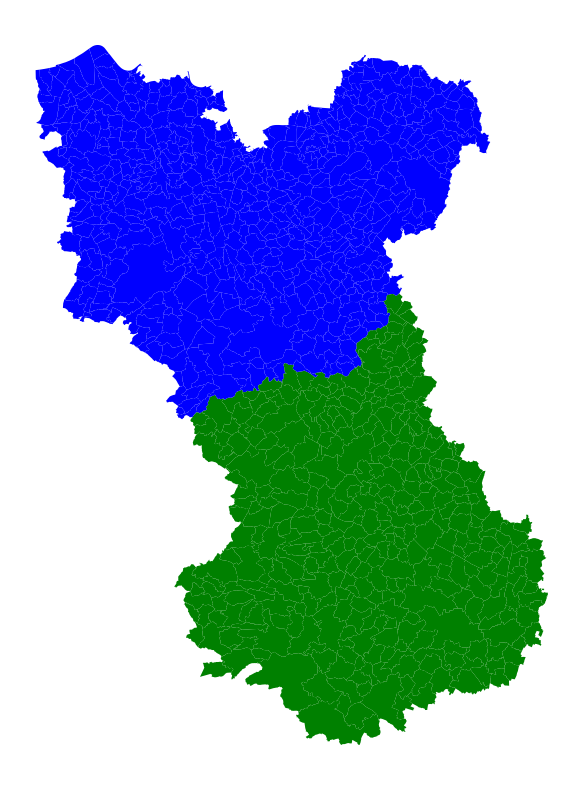

In [6]:
# Assuming 'merged_gdf' is your merged GeoDataFrame with the department information

# Filter the GeoDataFrame for departments 27 and 28
departments_to_plot = merged_gdf[merged_gdf['DEP'].isin(['27', '28'])]

# Create a color column based on the department code
departments_to_plot['color'] = departments_to_plot['DEP'].map({'27': 'blue', '28': 'green'})

# Plot the map using the geometries and the color assigned to each department
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as per your need
departments_to_plot.plot(ax=ax, color=departments_to_plot['color'])

# Optional: Remove the axis for a cleaner look
ax.axis('off')

# Show the plot
plt.show()


# Extract geometry

In [7]:
path_gpd_communes="../data/communes-20220101-shp/"
path_df_communes="../data/cog_ensemble_2021_csv/commune2021.csv"

gdf_communes = gpd.read_file(path_gpd_communes)
gdf_communes.drop(columns=["nom", "wikipedia", "surf_ha"], inplace=True)

df_communes = pd.read_csv(path_df_communes)
df_communes.drop(
    columns=[
        "TYPECOM",
        "REG",
        "CTCD",
        "ARR",
        "TNCC",
        "NCC",
        "NCCENR",
        "LIBELLE",
        "CAN",
        "COMPARENT",
    ],
    inplace=True,
)

In [12]:
# Merge the GeoDataFrame with the DataFrame on the 'insee' and 'COM' columns
merged_communes_gdf = gdf_communes.merge(df_communes, left_on="insee", right_on="COM")
merged_communes_gdf.drop(columns=["COM"], inplace=True)

condition = merged_communes_gdf["DEP"].isin(["27", "28"])
merged_communes_gdf = merged_communes_gdf[condition].copy()

# Assuming 'gdf_communes' is your GeoDataFrame of communes with polygon geometries
gdf_communes = merged_communes_gdf

In [ ]:
# Ensure both GeoDataFrames use the same CRS
# gdf_communes = gdf_communes.to_crs(gdf_meteorological.crs)

# Calculate the centroids of the communes if they are not already points
gdf_communes["centroid"] = gdf_communes.geometry.centroid

# Initialize a column for the nearest meteorological data
# for attribute in gdf_meteorological.columns.drop("geometry"):
#     gdf_communes[attribute] = None

In [ ]:
# Find the nearest meteorological point for each commune centroid
# for index, commune in gdf_communes.iterrows():
    # Use unary_union to create a single geometry that includes all meteorological points
    # This speeds up the operation considerably
#    nearest_geom = nearest_points(
#        commune["centroid"], gdf_meteorological.unary_union
#    )[1]

    # Get the nearest point's data
#    nearest_data = gdf_meteorological.loc[
#        gdf_meteorological["geometry"] == nearest_geom
#    ]

    # Assign the data to the commune's row
#    for attribute in gdf_meteorological.columns.drop("geometry"):
#        gdf_communes.at[index, attribute] = nearest_data[attribute].values[0]

# Drop the centroid column if you wish
# gdf_communes = gdf_communes.drop(columns=["centroid"])

# list_col = [
#    "insee",
#     "DEP",
#    "precipitation",
#    "r_min",
#    "ssrd_mean",
#    "Tmax",
#    "Tavg",
#    "Tmin",
#    "ws10_mean",
#]
#for column in list_col:
#    gdf_communes[column] = gdf_communes[column].astype(float)

In [14]:
df_meteorological = pd.read_parquet("../data/ERA5_data.parquet")
# Let's say you want to plot the data for a specific date
specific_date = "2020-01-01"  # for example
df_meteorological = df_meteorological[
    df_meteorological.index.get_level_values("date") == specific_date
].copy()

gdf_meteorological = gpd.GeoDataFrame(
        df_meteorological,
        geometry=gpd.points_from_xy(
            df_meteorological.index.get_level_values("longitude"),
            df_meteorological.index.get_level_values("latitude"),
        ),
    )

gdf_meteorological["id"] = range(len(gdf_meteorological))

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [20]:
# gdf_communes = gdf_communes.to_crs(gdf_meteorological.crs)

In [21]:
gdf_communes["nearest_id"] = None
# Calculate the centroids of the communes if they are not already points
gdf_communes["centroid"] = gdf_communes.geometry.centroid

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
gdf_communes

insee                                           geometry DEP  \
15793  27146  POLYGON ((0.38652 49.25930, 0.38676 49.25959, ...  27   
15794  27071  POLYGON ((0.38054 49.28083, 0.38080 49.28203, ...  27   
15796  27021  POLYGON ((0.38281 49.21603, 0.38299 49.21607, ...  27   
15797  27170  POLYGON ((0.36890 49.24405, 0.37074 49.24570, ...  27   
15798  27100  POLYGON ((0.37254 49.35384, 0.37256 49.35396, ...  27   
...      ...                                                ...  ..   
34972  27311  POLYGON ((0.72697 49.18575, 0.72746 49.18608, ...  27   
34974  27444  POLYGON ((0.71963 49.00957, 0.72308 49.01336, ...  27   
34975  27102  POLYGON ((0.73451 49.34513, 0.73477 49.34894, ...  27   
34976  27089  POLYGON ((0.73820 49.30214, 0.73847 49.30300, ...  27   
35076  27069  POLYGON ((0.71209 48.80381, 0.71213 48.80400, ...  27   

      nearest_id                  centroid  
15793       None  POINT (0.40632 49.28012)  
15794       None  POINT (0.39068 49.27589)  
15796       None  POINT (0.40236 49.20503)  
15797       None  POINT (0.38429 49.25179)  
15798       None  POINT (0.39255 49.36989)  
...          ...                       ...  
34972       None  POINT (0.77521 49.16607)  
34974       None  POINT (0.76234 49.00650)  
34975       None  POINT (0.76961 49.36094)  
34976       None  POINT (0.78006 49.29473)  
35076       None  POINT (0.74756 48.81636)  

[950 rows x 5 columns]

In [23]:
gdf_meteorological

precipitation      r_min  ssrd_mean      Tmax  \
latitude longitude date                                                        
50.0     0.00      2020-01-01       0.601374  99.107101  15.122723  8.966888   
         0.25      2020-01-01       0.641469  99.343658  15.913442  8.173553   
         0.50      2020-01-01       0.530902  97.405029  17.724632  7.693909   
         0.75      2020-01-01       0.340171  94.349960  18.926947  6.674866   
         1.00      2020-01-01       0.298861  94.223022  19.384005  5.906433   
...                                      ...        ...        ...       ...   
47.0     1.50      2020-01-01       3.257032  90.853500  15.130843  7.967773   
         1.75      2020-01-01       3.125828  89.079308  17.869949  7.977722   
         2.00      2020-01-01       3.059003  87.781120  20.939470  7.986023   
         2.25      2020-01-01       2.285160  84.555840  23.785734  7.750336   
         2.50      2020-01-01       1.354575  85.528038  26.769199  7.257416   

                                   Tavg      Tmin  ws10_mean  \
latitude longitude date                                        
50.0     0.00      2020-01-01  7.548973  5.383636   3.994449   
         0.25      2020-01-01  6.749554  4.560425   3.662736   
         0.50      2020-01-01  6.233397  4.069153   3.695206   
         0.75      2020-01-01  5.053221  2.897430   3.497049   
         1.00      2020-01-01  4.300970  2.329803   3.475597   
...                                 ...       ...        ...   
47.0     1.50      2020-01-01  5.984374  2.849304   3.446622   
         1.75      2020-01-01  5.750010  1.752258   3.182581   
         2.00      2020-01-01  5.544488  0.821167   2.882626   
         2.25      2020-01-01  4.934691  0.437775   2.456040   
         2.50      2020-01-01  4.216881 -0.348907   2.238958   

                                               geometry   id  
latitude longitude date                                       
50.0     0.00      2020-01-01  POINT (0.00000 50.00000)    0  
         0.25      2020-01-01  POINT (0.25000 50.00000)    1  
         0.50      2020-01-01  POINT (0.50000 50.00000)    2  
         0.75      2020-01-01  POINT (0.75000 50.00000)    3  
         1.00      2020-01-01  POINT (1.00000 50.00000)    4  
...                                                 ...  ...  
47.0     1.50      2020-01-01  POINT (1.50000 47.00000)  138  
         1.75      2020-01-01  POINT (1.75000 47.00000)  139  
         2.00      2020-01-01  POINT (2.00000 47.00000)  140  
         2.25      2020-01-01  POINT (2.25000 47.00000)  141  
         2.50      2020-01-01  POINT (2.50000 47.00000)  142  

[143 rows x 9 columns]

In [27]:
# Find the nearest meteorological point for each commune centroid
for index, commune in gdf_communes.iterrows():
    # Use unary_union to create a single geometry that includes all meteorological points
    # This speeds up the operation considerably
    nearest_geom = nearest_points(
        commune["centroid"], gdf_meteorological.unary_union
    )[1]

    # Get the nearest point's data
    nearest_data = gdf_meteorological.loc[
        gdf_meteorological["geometry"] == nearest_geom
    ]

    # Assign the id of the nearest point
    gdf_communes.at[index, "nearest_id"] = nearest_data["id"].values[0]

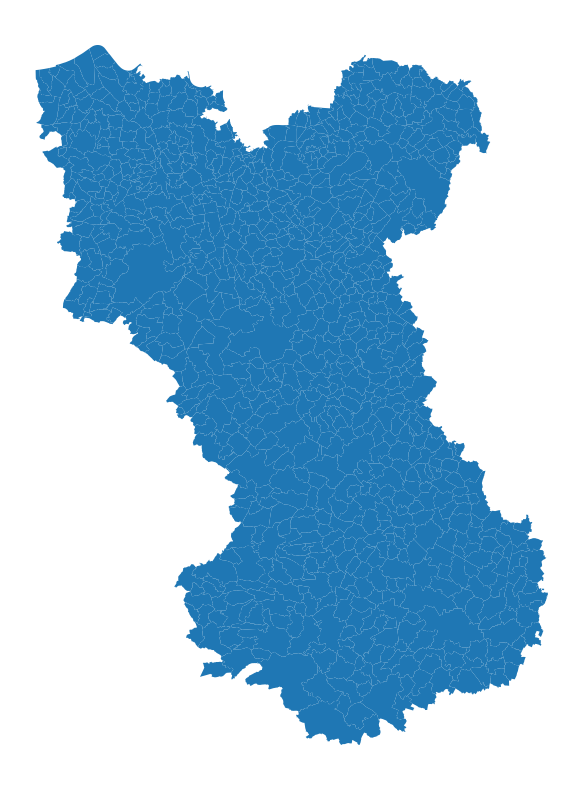

In [29]:
# Plot the map using the geometries
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as per your need
gdf_communes.plot(ax=ax)

# Optional: Remove the axis for a cleaner look
ax.axis('off')

# Show the plot
plt.show()


In [30]:
gdf_communes.drop(columns=["centroid"], inplace=True)

gdf_communes_meteo = gdf_communes.dissolve(by="nearest_id", as_index=False)

# Convert the GeoDataFrame to GeoJSON
# geojson_communes_meteo = gdf_communes_meteo.to_json()

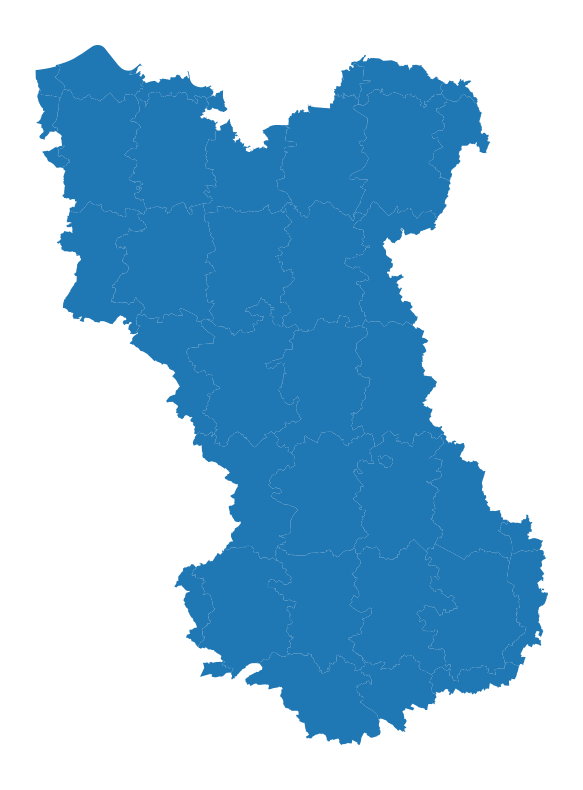

In [32]:
# Plot the map using the geometries
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as per your need
gdf_communes_meteo.plot(ax=ax)

# Optional: Remove the axis for a cleaner look
ax.axis('off')

# Show the plot
plt.show()


In [36]:
# Merge the dataframes
gdf_communes_test = gdf_communes_meteo.merge(gdf_meteorological[['id', 'precipitation']], 
                                              left_on='nearest_id', 
                                              right_on='id', 
                                              how='left')

# Drop the extra 'id' column if needed
# gdf_communes_test.drop('id', axis=1, inplace=True)

In [37]:
gdf_communes_test

nearest_id                                           geometry  insee DEP  \
0           23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
1           24  POLYGON ((0.47326 49.37676, 0.47262 49.37597, ...  27169  27   
2           25  MULTIPOLYGON (((0.62430 49.37608, 0.62442 49.3...  27006  27   
3           27  POLYGON ((1.28509 49.38811, 1.28681 49.38830, ...  27366  27   
4           28  POLYGON ((1.53933 49.37367, 1.53989 49.37467, ...  27377  27   
5           29  POLYGON ((1.65550 49.36728, 1.65668 49.36767, ...  27392  27   
6           34  MULTIPOLYGON (((0.31923 49.25126, 0.31927 49.2...  27384  27   
7           35  POLYGON ((0.40836 49.12849, 0.40873 49.12854, ...  27146  27   
8           36  POLYGON ((0.85710 49.15905, 0.85723 49.15884, ...  27018  27   
9           37  MULTIPOLYGON (((0.84999 49.13787, 0.85008 49.1...  27483  27   
10          38  POLYGON ((1.37670 49.15107, 1.37661 49.15101, ...  27348  27   
11          39  POLYGON ((1.34928 49.11253, 1.34928 49.11353, ...  27396  27   
12          40  POLYGON ((1.63415 49.19393, 1.63468 49.19409, ...  27284  27   
13          46  POLYGON ((0.58507 48.87678, 0.58605 48.87912, ...  27289  27   
14          47  POLYGON ((0.86230 48.93889, 0.86265 48.93775, ...  27516  27   
15          48  POLYGON ((0.86680 48.88463, 0.87077 48.88457, ...  27451  27   
16          49  POLYGON ((1.32184 48.86878, 1.32210 48.86927, ...  27546  27   
17          50  POLYGON ((1.53827 48.90672, 1.53840 48.90579, ...  27220  27   
18          58  POLYGON ((0.82155 48.64458, 0.82192 48.64493, ...  27359  27   
19          59  POLYGON ((0.88763 48.63300, 0.88780 48.63308, ...  27002  27   
20          60  POLYGON ((1.08903 48.63289, 1.08927 48.63544, ...  27350  27   
21          61  POLYGON ((1.49002 48.62231, 1.49005 48.62234, ...  28371  28   
22          70  POLYGON ((1.10332 48.41239, 1.10407 48.41155, ...  28248  28   
23          71  MULTIPOLYGON (((1.35944 48.40130, 1.35953 48.4...  28040  28   
24          72  POLYGON ((1.34994 48.38422, 1.35034 48.38471, ...  28060  28   
25          73  POLYGON ((1.82812 48.42306, 1.82852 48.42259, ...  28013  28   
26          74  POLYGON ((1.87447 48.37392, 1.87460 48.37449, ...  28363  28   
27          80  POLYGON ((0.79559 48.18976, 0.79570 48.19045, ...  28111  28   
28          81  POLYGON ((0.90927 48.14408, 0.90991 48.14429, ...  28161  28   
29          82  POLYGON ((1.35296 48.11722, 1.35313 48.11733, ...  28091  28   
30          83  POLYGON ((1.56525 48.12712, 1.56542 48.12720, ...  28418  28   
31          84  POLYGON ((1.84697 48.14555, 1.84771 48.14397, ...  28029  28   
32          85  POLYGON ((1.84213 48.15757, 1.85279 48.16308, ...  28092  28   
33          92  POLYGON ((0.84113 48.10301, 0.84150 48.10357, ...  28078  28   
34          93  POLYGON ((1.15939 48.01776, 1.15981 48.01914, ...  28012  28   
35          94  POLYGON ((1.60156 48.09155, 1.61135 48.08810, ...  28256  28   
36          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   

    id  precipitation  
0   23       0.846773  
1   24       0.400908  
2   25       0.375401  
3   27       0.198040  
4   28       0.250272  
5   29       0.301294  
6   34       0.925727  
7   35       0.980400  
8   36       0.913579  
9   37       0.710696  
10  38       0.352323  
11  39       0.398487  
12  40       0.449512  
13  46       1.488205  
14  47       1.341209  
15  48       1.148053  
16  49       0.724059  
17  50       0.880789  
18  58       1.002267  
19  59       1.169920  
20  60       1.507644  
21  61       2.175812  
22  70       2.349540  
23  71       2.588861  
24  72       3.145270  
25  73       3.593545  
26  74       4.011456  
27  80       3.534023  
28  81       3.920339  
29  82       4.191246  
30  83       4.023601  
31  84       4.357696  
32  85       4.985772  
33  92       4.972394  
34  93       4.119579  
35  94       4.423283  
36  95       4.702705

In [47]:
def create_map(geo_df, geojson_data, columns=['id', 'precipitation'], legend_title='Precipitation levels'):
    # Create a Folium map object
    m = folium.Map(
        location=[
            geo_df["geometry"].centroid.y.mean(),
            geo_df["geometry"].centroid.x.mean(),
        ],
        zoom_start=6,
    )

    # Create a Choropleth layer (colors based on the attribute represented)
    choropleth = folium.Choropleth(
        geo_data=geojson_data,
        data=geo_df,
        columns=columns,
        key_on="feature.properties.id",
        fill_color="YlGnBu",  # Make sure this color scale is valid
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_title,
    ).add_to(m)

    # Create a GeoJson layer with tooltips
    geojson_layer = folium.GeoJson(
        geojson_data,
        name="Communes",
        style_function=lambda feature: {
            "color": "black",
            "weight": 0.5,
            "fillOpacity": 0.1,
        },
        tooltip=GeoJsonTooltip(
            fields=["precipitation"],
            aliases=["Precipitation: "],
            localize=True,
            sticky=True,
        ),
    ).add_to(m)

    # Add the layer control
    folium.LayerControl().add_to(m)

    return m

In [49]:
geojson_test = gdf_communes_test.to_json()
m = create_map(gdf_communes_test, geojson_test)

m

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [76]:
df_meteo = pd.read_parquet("../data/ERA5_data.parquet")
# Reset index to make 'date' a column
df_meteo_reset = df_meteo.reset_index()

# Group by 'date' and calculate the mean for each date
mean_per_date = df_meteo_reset.groupby('date').mean()
mean_per_date.drop(columns=['latitude', 'longitude'], inplace=True)
mean_per_date = mean_per_date.reset_index()

# Filter the data from September of the selected year to August of the next year
start_date = pd.to_datetime(f"2015-09-01")
end_date = pd.to_datetime(f"2016-08-31")
filtered_df = mean_per_date[(mean_per_date['date'] >= start_date) & (mean_per_date['date'] < end_date)]
mean_per_date = filtered_df.groupby('date').mean().reset_index()
mean_per_date

date  precipitation      r_min   ssrd_mean       Tmax       Tavg  \
0   2015-09-01       3.607261  57.206810  163.274475  19.923859  16.752829   
1   2015-09-02       0.436993  49.258884  199.461060  19.157366  14.578058   
2   2015-09-03       0.436761  49.579082  192.024139  17.977329  13.711134   
3   2015-09-04       0.608300  56.272381  163.283493  16.594973  13.468030   
4   2015-09-05       0.783590  56.182549  142.140472  18.046217  14.209454   
..         ...            ...        ...         ...        ...        ...   
360 2016-08-26       0.012816  41.502331  242.315353  30.637768  24.428177   
361 2016-08-27       0.653626  33.265125  236.022278  33.301163  25.161322   
362 2016-08-28       0.133471  42.278194  220.427673  25.690069  21.215454   
363 2016-08-29       1.285574  59.894325  150.101822  22.015030  18.774790   
364 2016-08-30       0.018690  42.941883  213.074677  25.068760  19.038439   

          Tmin  ws10_mean  
0    12.778292   3.878715  
1     9.872416   2.484607  
2     9.048095   2.816189  
3    10.240653   2.483626  
4    10.870948   2.711553  
..         ...        ...  
360  18.726231   2.603266  
361  17.689171   2.892527  
362  17.292406   4.724998  
363  15.672016   3.234687  
364  13.054521   2.626868  

[365 rows x 8 columns]

In [147]:
df_meteo = pd.read_parquet("../data/ERA5_data.parquet")
# Reset index to make 'date' a column
df_meteo_reset = df_meteo.reset_index()

# Group by 'date' and calculate the mean for each date
mean_per_date = df_meteo_reset.groupby('date').mean()
mean_per_date.drop(columns=['latitude', 'longitude'], inplace=True)
mean_per_date = mean_per_date.reset_index()

# Filter the data from September of the selected year to August of the next year
start_date = pd.to_datetime(f"2019-09-01")
end_date = pd.to_datetime(f"2020-08-31")
filtered_df = mean_per_date[(mean_per_date['date'] >= start_date) & (mean_per_date['date'] <= end_date)]
# Group by year and month and calculate the mean
monthly_means = filtered_df.groupby([filtered_df['date'].dt.year.rename('year'),
                                  filtered_df['date'].dt.month.rename('month')]).mean()


# Reset the index to turn the grouping columns back into regular columns
monthly_means = monthly_means.reset_index()

# Create a new 'date' column with the first day of each month
monthly_means['date'] = pd.to_datetime(monthly_means.rename(columns={'date': 'year'}).apply(lambda row: f"{int(row['year'])}-{int(row['month'])}-01", axis=1))
df_meteo_reset['month'] = df_meteo_reset['date'].dt.month
overall_mean = df_meteo_reset.groupby('month').mean().reset_index()
overall_mean = overall_mean.merge(monthly_means[['month', 'date']], how='left', on='month')

In [154]:
df_meteo = pd.read_parquet("../data/ERA5_data.parquet")
# Reset index to make 'date' a column
df_meteo_reset = df_meteo.reset_index(level='date')

In [159]:
mean_per_date = df_meteo_reset.groupby('date', as_index=False).mean()
mean_per_date

date  precipitation      r_min  ssrd_mean       Tmax      Tavg  \
0    2000-01-01       0.496082  93.970734  11.925471   9.592351  8.366585   
1    2000-01-02       0.583157  91.714920  17.701139   9.630132  8.276375   
2    2000-01-03       0.249137  82.653671  26.340385   9.114718  7.522393   
3    2000-01-04       4.079473  83.722855  13.870637  10.054406  8.454965   
4    2000-01-05       0.187523  81.067703  33.989872   9.498370  7.364235   
...         ...            ...        ...        ...        ...       ...   
7666 2020-12-27      19.252735  74.248665   7.371152   7.538970  5.840019   
7667 2020-12-28       6.177622  80.155838  29.151428   5.099493  4.017628   
7668 2020-12-29       2.123721  82.603905  25.866968   5.668202  4.135846   
7669 2020-12-30       4.678384  75.878548  37.853230   6.027081  4.063694   
7670 2020-12-31       2.169058  77.975456  38.069904   5.805915  3.583689   

          Tmin  ws10_mean  
0     6.989871   2.211870  
1     7.157168   2.472579  
2     6.430016   4.625702  
3     6.670069   5.758259  
4     5.288090   3.892157  
...        ...        ...  
7666  3.319561   8.559894  
7667  2.697633   5.441429  
7668  2.675700   3.936425  
7669  2.082895   3.896895  
7670 -0.731934   3.314216  

[7671 rows x 8 columns]

In [160]:
gdf_meteorological

precipitation      r_min  ssrd_mean      Tmax  \
latitude longitude date                                                        
50.0     0.00      2020-01-01       0.601374  99.107101  15.122723  8.966888   
         0.25      2020-01-01       0.641469  99.343658  15.913442  8.173553   
         0.50      2020-01-01       0.530902  97.405029  17.724632  7.693909   
         0.75      2020-01-01       0.340171  94.349960  18.926947  6.674866   
         1.00      2020-01-01       0.298861  94.223022  19.384005  5.906433   
...                                      ...        ...        ...       ...   
47.0     1.50      2020-01-01       3.257032  90.853500  15.130843  7.967773   
         1.75      2020-01-01       3.125828  89.079308  17.869949  7.977722   
         2.00      2020-01-01       3.059003  87.781120  20.939470  7.986023   
         2.25      2020-01-01       2.285160  84.555840  23.785734  7.750336   
         2.50      2020-01-01       1.354575  85.528038  26.769199  7.257416   

                                   Tavg      Tmin  ws10_mean  \
latitude longitude date                                        
50.0     0.00      2020-01-01  7.548973  5.383636   3.994449   
         0.25      2020-01-01  6.749554  4.560425   3.662736   
         0.50      2020-01-01  6.233397  4.069153   3.695206   
         0.75      2020-01-01  5.053221  2.897430   3.497049   
         1.00      2020-01-01  4.300970  2.329803   3.475597   
...                                 ...       ...        ...   
47.0     1.50      2020-01-01  5.984374  2.849304   3.446622   
         1.75      2020-01-01  5.750010  1.752258   3.182581   
         2.00      2020-01-01  5.544488  0.821167   2.882626   
         2.25      2020-01-01  4.934691  0.437775   2.456040   
         2.50      2020-01-01  4.216881 -0.348907   2.238958   

                                               geometry   id  
latitude longitude date                                       
50.0     0.00      2020-01-01  POINT (0.00000 50.00000)    0  
         0.25      2020-01-01  POINT (0.25000 50.00000)    1  
         0.50      2020-01-01  POINT (0.50000 50.00000)    2  
         0.75      2020-01-01  POINT (0.75000 50.00000)    3  
         1.00      2020-01-01  POINT (1.00000 50.00000)    4  
...                                                 ...  ...  
47.0     1.50      2020-01-01  POINT (1.50000 47.00000)  138  
         1.75      2020-01-01  POINT (1.75000 47.00000)  139  
         2.00      2020-01-01  POINT (2.00000 47.00000)  140  
         2.25      2020-01-01  POINT (2.25000 47.00000)  141  
         2.50      2020-01-01  POINT (2.50000 47.00000)  142  

[143 rows x 9 columns]

In [161]:
lat_lon_to_id = gdf_meteorological.reset_index().drop_duplicates(subset=['latitude', 'longitude']).set_index(['latitude', 'longitude'])['id']
lat_lon_to_id

latitude  longitude
50.0      0.00           0
          0.25           1
          0.50           2
          0.75           3
          1.00           4
                      ... 
47.0      1.50         138
          1.75         139
          2.00         140
          2.25         141
          2.50         142
Name: id, Length: 143, dtype: int64

In [ ]:
def get_monthly_mean(df_meteo, year=None, compare_year=2020):
    df_meteo_reset = df_meteo.reset_index(level='date')

    if year is not None:
        # Filter the data from September of the selected year to August of the next year
        start_date = pd.to_datetime(f"{year-1}-09-01")
        end_date = pd.to_datetime(f"{year}-08-31")
        filtered_df = df_meteo_reset[(df_meteo_reset['date'] >= start_date) & (df_meteo_reset['date'] <= end_date)]

        # Group by latitude, longitude, year, and month, then calculate the mean
        monthly_means = filtered_df.groupby([pd.Grouper(level='latitude'), 
                            pd.Grouper(level='longitude'), 
                            filtered_df['date'].dt.year.rename('year'), 
                            filtered_df['date'].dt.month.rename('month')]).mean()
        
        # Reset index to turn 'year' and 'month' back into columns
        monthly_means = monthly_means.reset_index()

    else:
        filtered_df = df_meteo_reset
        # Group by latitude, longitude, year, and month, then calculate the mean
        monthly_means = filtered_df.groupby([pd.Grouper(level='latitude'), 
                            pd.Grouper(level='longitude'), 
                            filtered_df['date'].dt.month.rename('month')]).mean()
        
        # Reset index to turn 'year' and 'month' back into columns
        monthly_means = monthly_means.reset_index()

    # Create a new 'date' column that is the first day of each month and year
    monthly_means['date'] = pd.to_datetime(monthly_means['year'].astype(str) + '-' + 
                                       monthly_means['month'].astype(str) + '-01')

    # Drop the 'year' and 'month' columns as they are now redundant with the 'date' column
    monthly_means.drop(['year', 'month'], axis=1, inplace=True)

    # Set 'latitude' and 'longitude' back as the index
    monthly_means.set_index(['latitude', 'longitude'], inplace=True)
    return monthly_means

In [202]:
def get_monthly_mean(df_meteo, year=None, compare_year=2020):
    df_meteo_reset = df_meteo.reset_index(level='date')

    if year is not None:
        # Filter the data from September of the selected year to August of the next year
        start_date = pd.to_datetime(f"{year-1}-09-01")
        end_date = pd.to_datetime(f"{year}-08-31")
        filtered_df = df_meteo_reset[(df_meteo_reset['date'] >= start_date) & (df_meteo_reset['date'] <= end_date)]

        # Group by latitude, longitude, year, and month, then calculate the mean
        monthly_means = filtered_df.groupby([pd.Grouper(level='latitude'), 
                            pd.Grouper(level='longitude'), 
                            filtered_df['date'].dt.year.rename('year'), 
                            filtered_df['date'].dt.month.rename('month')]).mean()
        
        # Reset index to turn 'year' and 'month' back into columns
        monthly_means = monthly_means.reset_index()

        # Create a new 'date' column that is the first day of each month and year
        monthly_means['date'] = pd.to_datetime(monthly_means['year'].astype(str) + '-' + 
                                       monthly_means['month'].astype(str) + '-01')

    else:
        filtered_df = df_meteo_reset
        # Group by latitude, longitude, year, and month, then calculate the mean
        monthly_means = filtered_df.groupby([pd.Grouper(level='latitude'), 
                            pd.Grouper(level='longitude'), 
                            filtered_df['date'].dt.month.rename('month')]).mean()
        monthly_means['year'] = monthly_means.index.get_level_values('month').map(lambda x: compare_year if x < 8 else compare_year-1)

        # Reset index to turn 'year' and 'month' back into columns
        monthly_means = monthly_means.reset_index()

        # Create a new 'date' column that is the first day of each month and year
        monthly_means['date'] = pd.to_datetime(monthly_means['year'].astype(str) + '-' + 
                                       monthly_means['month'].astype(str) + '-01')

    # Drop the 'year' and 'month' columns as they are now redundant with the 'date' column
    monthly_means.drop(['year', 'month'], axis=1, inplace=True)

    # Set 'latitude' and 'longitude' back as the index
    monthly_means.set_index(['latitude', 'longitude'], inplace=True)
    return monthly_means

In [203]:
get_monthly_mean(df_meteo=df_meteo, year=2020)

precipitation      r_min   ssrd_mean       Tmax  \
latitude longitude                                                    
47.0     0.0             1.130678  44.132977  179.983002  23.811192   
         0.0             4.410964  67.239899   82.396889  17.737759   
         0.0             4.552987  73.709938   55.319355  11.405671   
         0.0             2.775600  72.515495   41.324459  10.814667   
         0.0             1.533695  72.955238   46.881226  10.432451   
...                           ...        ...         ...        ...   
50.0     2.5             1.181927  42.679653  225.420975  17.871405   
         2.5             0.418119  45.714233  256.235321  18.420681   
         2.5             1.529068  51.291214  228.793152  20.873381   
         2.5             1.042102  48.901268  229.128082  22.382496   
         2.5             2.512293  49.905556  198.502594  24.923124   

                         Tavg       Tmin  ws10_mean       date  
latitude longitude                                              
47.0     0.0        17.857912  12.138371   4.084358 2019-09-01  
         0.0        14.173909  11.114225   4.003584 2019-10-01  
         0.0         8.445152   5.735086   4.167140 2019-11-01  
         0.0         7.921417   4.942171   4.738321 2019-12-01  
         0.0         7.461326   4.531360   4.461374 2020-01-01  
...                       ...        ...        ...        ...  
50.0     2.5        12.295783   6.346322   3.342138 2020-04-01  
         2.5        13.781231   7.916088   3.763219 2020-05-01  
         2.5        16.788128  12.037708   3.446147 2020-06-01  
         2.5        17.869055  12.744950   3.812749 2020-07-01  
         2.5        20.172911  15.527044   3.349717 2020-08-01  

[1716 rows x 8 columns]

In [204]:
get_monthly_mean(df_meteo=df_meteo, year=None)

precipitation      r_min   ssrd_mean       Tmax  \
latitude longitude                                                    
47.0     0.0             1.951807  73.695419   45.998142   8.415554   
         0.0             1.883653  64.912491   82.753029   9.660465   
         0.0             1.894493  57.729416  137.991425  13.075434   
         0.0             1.861693  51.112411  196.767609  16.403963   
         0.0             2.177756  52.620380  225.566208  19.655939   
...                           ...        ...         ...        ...   
50.0     2.5             2.344491  54.842026  188.593857  22.461729   
         2.5             1.531536  58.298271  138.707489  19.541739   
         2.5             2.320633  67.973305   82.376152  15.234005   
         2.5             2.391962  76.372208   43.753601  10.228875   
         2.5             2.561949  78.394569   30.094908   7.047293   

                         Tavg       Tmin  ws10_mean       date  
latitude longitude                                              
47.0     0.0         5.560139   2.791855   4.102659 2020-01-01  
         0.0         5.946511   2.512861   4.205665 2020-02-01  
         0.0         8.594934   4.268428   3.994792 2020-03-01  
         0.0        11.485754   6.371196   3.603471 2020-04-01  
         0.0        14.824687   9.602165   3.489085 2020-05-01  
...                       ...        ...        ...        ...  
50.0     2.5        18.041077  13.598213   3.316499 2019-08-01  
         2.5        15.245704  11.052745   3.495207 2019-09-01  
         2.5        11.847821   8.688622   4.017187 2019-10-01  
         2.5         7.708781   5.241911   4.147452 2019-11-01  
         2.5         4.829277   2.605972   4.405817 2019-12-01  

[1716 rows x 8 columns]

In [216]:
def load_meteo_data_date(path="../data/ERA5_data.parquet", specific_date='2020-01-01'):
    df_meteorological = pd.read_parquet(path)
    df_specific_date = df_meteorological[
        df_meteorological.index.get_level_values("date") == specific_date
    ]

    gdf_meteorological = gpd.GeoDataFrame(
        df_specific_date,
        geometry=gpd.points_from_xy(
            df_specific_date.index.get_level_values("longitude"),
            df_specific_date.index.get_level_values("latitude"),
        ),
    )

    gdf_meteorological["id"] = range(len(gdf_meteorological))

    return gdf_meteorological

def convert_lat_long_to_dpt(df_meteo, gdf_geom):
    gdf_base_meteo = load_meteo_data_date()
    lat_lon_to_id = gdf_base_meteo.reset_index().drop_duplicates(subset=['latitude', 'longitude']).set_index(['latitude', 'longitude'])['id']

    df_meteo_with_id = df_meteo.copy()
    df_meteo_with_id['id'] = df_meteo_with_id.index.map(lat_lon_to_id)

    return df_meteo_with_id

In [219]:
df_meteo_test = get_monthly_mean(df_meteo=df_meteo, year=None)
test_conv = convert_lat_long_to_dpt(df_meteo_test, None)
test_conv

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


precipitation      r_min   ssrd_mean       Tmax  \
latitude longitude                                                    
47.0     0.0             1.951807  73.695419   45.998142   8.415554   
         0.0             1.883653  64.912491   82.753029   9.660465   
         0.0             1.894493  57.729416  137.991425  13.075434   
         0.0             1.861693  51.112411  196.767609  16.403963   
         0.0             2.177756  52.620380  225.566208  19.655939   
...                           ...        ...         ...        ...   
50.0     2.5             2.344491  54.842026  188.593857  22.461729   
         2.5             1.531536  58.298271  138.707489  19.541739   
         2.5             2.320633  67.973305   82.376152  15.234005   
         2.5             2.391962  76.372208   43.753601  10.228875   
         2.5             2.561949  78.394569   30.094908   7.047293   

                         Tavg       Tmin  ws10_mean       date   id  
latitude longitude                                                   
47.0     0.0         5.560139   2.791855   4.102659 2020-01-01  132  
         0.0         5.946511   2.512861   4.205665 2020-02-01  132  
         0.0         8.594934   4.268428   3.994792 2020-03-01  132  
         0.0        11.485754   6.371196   3.603471 2020-04-01  132  
         0.0        14.824687   9.602165   3.489085 2020-05-01  132  
...                       ...        ...        ...        ...  ...  
50.0     2.5        18.041077  13.598213   3.316499 2019-08-01   10  
         2.5        15.245704  11.052745   3.495207 2019-09-01   10  
         2.5        11.847821   8.688622   4.017187 2019-10-01   10  
         2.5         7.708781   5.241911   4.147452 2019-11-01   10  
         2.5         4.829277   2.605972   4.405817 2019-12-01   10  

[1716 rows x 9 columns]

In [218]:
gdf_communes_meteo

nearest_id                                           geometry  insee DEP
0           23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27
1           24  POLYGON ((0.47326 49.37676, 0.47262 49.37597, ...  27169  27
2           25  MULTIPOLYGON (((0.62430 49.37608, 0.62442 49.3...  27006  27
3           27  POLYGON ((1.28509 49.38811, 1.28681 49.38830, ...  27366  27
4           28  POLYGON ((1.53933 49.37367, 1.53989 49.37467, ...  27377  27
5           29  POLYGON ((1.65550 49.36728, 1.65668 49.36767, ...  27392  27
6           34  MULTIPOLYGON (((0.31923 49.25126, 0.31927 49.2...  27384  27
7           35  POLYGON ((0.40836 49.12849, 0.40873 49.12854, ...  27146  27
8           36  POLYGON ((0.85710 49.15905, 0.85723 49.15884, ...  27018  27
9           37  MULTIPOLYGON (((0.84999 49.13787, 0.85008 49.1...  27483  27
10          38  POLYGON ((1.37670 49.15107, 1.37661 49.15101, ...  27348  27
11          39  POLYGON ((1.34928 49.11253, 1.34928 49.11353, ...  27396  27
12          40  POLYGON ((1.63415 49.19393, 1.63468 49.19409, ...  27284  27
13          46  POLYGON ((0.58507 48.87678, 0.58605 48.87912, ...  27289  27
14          47  POLYGON ((0.86230 48.93889, 0.86265 48.93775, ...  27516  27
15          48  POLYGON ((0.86680 48.88463, 0.87077 48.88457, ...  27451  27
16          49  POLYGON ((1.32184 48.86878, 1.32210 48.86927, ...  27546  27
17          50  POLYGON ((1.53827 48.90672, 1.53840 48.90579, ...  27220  27
18          58  POLYGON ((0.82155 48.64458, 0.82192 48.64493, ...  27359  27
19          59  POLYGON ((0.88763 48.63300, 0.88780 48.63308, ...  27002  27
20          60  POLYGON ((1.08903 48.63289, 1.08927 48.63544, ...  27350  27
21          61  POLYGON ((1.49002 48.62231, 1.49005 48.62234, ...  28371  28
22          70  POLYGON ((1.10332 48.41239, 1.10407 48.41155, ...  28248  28
23          71  MULTIPOLYGON (((1.35944 48.40130, 1.35953 48.4...  28040  28
24          72  POLYGON ((1.34994 48.38422, 1.35034 48.38471, ...  28060  28
25          73  POLYGON ((1.82812 48.42306, 1.82852 48.42259, ...  28013  28
26          74  POLYGON ((1.87447 48.37392, 1.87460 48.37449, ...  28363  28
27          80  POLYGON ((0.79559 48.18976, 0.79570 48.19045, ...  28111  28
28          81  POLYGON ((0.90927 48.14408, 0.90991 48.14429, ...  28161  28
29          82  POLYGON ((1.35296 48.11722, 1.35313 48.11733, ...  28091  28
30          83  POLYGON ((1.56525 48.12712, 1.56542 48.12720, ...  28418  28
31          84  POLYGON ((1.84697 48.14555, 1.84771 48.14397, ...  28029  28
32          85  POLYGON ((1.84213 48.15757, 1.85279 48.16308, ...  28092  28
33          92  POLYGON ((0.84113 48.10301, 0.84150 48.10357, ...  28078  28
34          93  POLYGON ((1.15939 48.01776, 1.15981 48.01914, ...  28012  28
35          94  POLYGON ((1.60156 48.09155, 1.61135 48.08810, ...  28256  28
36          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28

In [229]:
gdf_meteorological_conv = gpd.GeoDataFrame(
        test_conv,
        geometry=gpd.points_from_xy(
            test_conv.index.get_level_values("longitude"),
            test_conv.index.get_level_values("latitude"),
        ),
    )
gdf_meteorological_conv

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


precipitation      r_min   ssrd_mean       Tmax  \
latitude longitude                                                    
47.0     0.0             1.951807  73.695419   45.998142   8.415554   
         0.0             1.883653  64.912491   82.753029   9.660465   
         0.0             1.894493  57.729416  137.991425  13.075434   
         0.0             1.861693  51.112411  196.767609  16.403963   
         0.0             2.177756  52.620380  225.566208  19.655939   
...                           ...        ...         ...        ...   
50.0     2.5             2.344491  54.842026  188.593857  22.461729   
         2.5             1.531536  58.298271  138.707489  19.541739   
         2.5             2.320633  67.973305   82.376152  15.234005   
         2.5             2.391962  76.372208   43.753601  10.228875   
         2.5             2.561949  78.394569   30.094908   7.047293   

                         Tavg       Tmin  ws10_mean       date   id  \
latitude longitude                                                    
47.0     0.0         5.560139   2.791855   4.102659 2020-01-01  132   
         0.0         5.946511   2.512861   4.205665 2020-02-01  132   
         0.0         8.594934   4.268428   3.994792 2020-03-01  132   
         0.0        11.485754   6.371196   3.603471 2020-04-01  132   
         0.0        14.824687   9.602165   3.489085 2020-05-01  132   
...                       ...        ...        ...        ...  ...   
50.0     2.5        18.041077  13.598213   3.316499 2019-08-01   10   
         2.5        15.245704  11.052745   3.495207 2019-09-01   10   
         2.5        11.847821   8.688622   4.017187 2019-10-01   10   
         2.5         7.708781   5.241911   4.147452 2019-11-01   10   
         2.5         4.829277   2.605972   4.405817 2019-12-01   10   

                                    geometry  
latitude longitude                            
47.0     0.0        POINT (0.00000 47.00000)  
         0.0        POINT (0.00000 47.00000)  
         0.0        POINT (0.00000 47.00000)  
         0.0        POINT (0.00000 47.00000)  
         0.0        POINT (0.00000 47.00000)  
...                                      ...  
50.0     2.5        POINT (2.50000 50.00000)  
         2.5        POINT (2.50000 50.00000)  
         2.5        POINT (2.50000 50.00000)  
         2.5        POINT (2.50000 50.00000)  
         2.5        POINT (2.50000 50.00000)  

[1716 rows x 10 columns]

In [237]:
# Merge the dataframes
gdf_communes_conv = gdf_communes_meteo.merge(gdf_meteorological_conv.drop(columns=['geometry']), 
                                              left_on='nearest_id', 
                                              right_on='id', 
                                              how='left')
gdf_communes_conv

nearest_id                                           geometry  insee DEP  \
0            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
1            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
2            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
3            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
4            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
..          ...                                                ...    ...  ..   
439          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
440          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
441          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
442          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
443          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   

     precipitation      r_min   ssrd_mean       Tmax       Tavg       Tmin  \
0         2.916230  74.573112   40.672253   7.526779   5.773280   3.927173   
1         2.807701  69.234871   74.679794   7.979279   5.872950   3.812261   
2         2.548813  64.635864  129.707779  10.116524   7.573842   5.083185   
3         2.098370  59.133247  199.540573  12.941129  10.013906   6.958821   
4         2.282849  62.328098  229.075516  15.467889  12.766875   9.838758   
..             ...        ...         ...        ...        ...        ...   
439       1.706656  45.922482  205.816376  25.209705  19.783161  14.189531   
440       1.350389  49.794312  154.266022  21.799046  16.375694  11.184992   
441       2.354241  63.221485   91.466850  16.797548  12.574288   8.817286   
442       2.294698  73.503487   50.041031  11.104274   8.037103   5.098024   
443       2.268622  76.472008   35.385326   7.763109   5.101384   2.491548   

     ws10_mean       date  id  
0     5.749628 2020-01-01  23  
1     5.636451 2020-02-01  23  
2     5.126078 2020-03-01  23  
3     4.449171 2020-04-01  23  
4     4.482005 2020-05-01  23  
..         ...        ...  ..  
439   3.228460 2019-08-01  95  
440   3.387175 2019-09-01  95  
441   3.718601 2019-10-01  95  
442   3.954925 2019-11-01  95  
443   4.289500 2019-12-01  95  

[444 rows x 13 columns]

In [238]:
gdf_communes_conv

nearest_id                                           geometry  insee DEP  \
0            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
1            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
2            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
3            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
4            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
..          ...                                                ...    ...  ..   
439          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
440          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
441          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
442          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
443          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   

     precipitation      r_min   ssrd_mean       Tmax       Tavg       Tmin  \
0         2.916230  74.573112   40.672253   7.526779   5.773280   3.927173   
1         2.807701  69.234871   74.679794   7.979279   5.872950   3.812261   
2         2.548813  64.635864  129.707779  10.116524   7.573842   5.083185   
3         2.098370  59.133247  199.540573  12.941129  10.013906   6.958821   
4         2.282849  62.328098  229.075516  15.467889  12.766875   9.838758   
..             ...        ...         ...        ...        ...        ...   
439       1.706656  45.922482  205.816376  25.209705  19.783161  14.189531   
440       1.350389  49.794312  154.266022  21.799046  16.375694  11.184992   
441       2.354241  63.221485   91.466850  16.797548  12.574288   8.817286   
442       2.294698  73.503487   50.041031  11.104274   8.037103   5.098024   
443       2.268622  76.472008   35.385326   7.763109   5.101384   2.491548   

     ws10_mean       date  id  
0     5.749628 2020-01-01  23  
1     5.636451 2020-02-01  23  
2     5.126078 2020-03-01  23  
3     4.449171 2020-04-01  23  
4     4.482005 2020-05-01  23  
..         ...        ...  ..  
439   3.228460 2019-08-01  95  
440   3.387175 2019-09-01  95  
441   3.718601 2019-10-01  95  
442   3.954925 2019-11-01  95  
443   4.289500 2019-12-01  95  

[444 rows x 13 columns]

In [240]:
gdf_communes_conv['area'] = gdf_communes_conv.area
gdf_communes_conv

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


nearest_id                                           geometry  insee DEP  \
0            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
1            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
2            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
3            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
4            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
..          ...                                                ...    ...  ..   
439          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
440          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
441          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
442          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
443          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   

     precipitation      r_min   ssrd_mean       Tmax       Tavg       Tmin  \
0         2.916230  74.573112   40.672253   7.526779   5.773280   3.927173   
1         2.807701  69.234871   74.679794   7.979279   5.872950   3.812261   
2         2.548813  64.635864  129.707779  10.116524   7.573842   5.083185   
3         2.098370  59.133247  199.540573  12.941129  10.013906   6.958821   
4         2.282849  62.328098  229.075516  15.467889  12.766875   9.838758   
..             ...        ...         ...        ...        ...        ...   
439       1.706656  45.922482  205.816376  25.209705  19.783161  14.189531   
440       1.350389  49.794312  154.266022  21.799046  16.375694  11.184992   
441       2.354241  63.221485   91.466850  16.797548  12.574288   8.817286   
442       2.294698  73.503487   50.041031  11.104274   8.037103   5.098024   
443       2.268622  76.472008   35.385326   7.763109   5.101384   2.491548   

     ws10_mean       date  id      area  
0     5.749628 2020-01-01  23  0.004627  
1     5.636451 2020-02-01  23  0.004627  
2     5.126078 2020-03-01  23  0.004627  
3     4.449171 2020-04-01  23  0.004627  
4     4.482005 2020-05-01  23  0.004627  
..         ...        ...  ..       ...  
439   3.228460 2019-08-01  95  0.012256  
440   3.387175 2019-09-01  95  0.012256  
441   3.718601 2019-10-01  95  0.012256  
442   3.954925 2019-11-01  95  0.012256  
443   4.289500 2019-12-01  95  0.012256  

[444 rows x 14 columns]

In [243]:
# Initialize a dictionary to store weighted averages
weighted_averages = {}
# Loop through the departments of interest
for department in ['27', '28']:
    # Filter the GeoDataFrame for the current department
    dept_data = gdf_communes_conv[gdf_communes_conv['DEP'] == department]

    # Calculate the weighted average
    total_area = dept_data['area'].sum()
    weighted_average = (dept_data['precipitation'] * dept_data['area']).sum() / total_area
    
    # Store the result
    weighted_averages[department] = weighted_average

In [244]:
weighted_averages

{'27': 2.08672232623145, '28': 1.9570905003820749}

In [247]:
# Calculate the area of each polygon if not already present
gdf_communes_conv['area'] = gdf_communes_conv.geometry.area

# Select columns to be used for weighted averaging
# Assuming these columns are known. Adjust the list as per your actual data columns
meteorological_columns = ['precipitation', 'r_min', 'Tavg']  # Example columns

# Function to calculate weighted average for a group
def weighted_avg(group, cols, weight_col):
    weighted_avgs = {}
    total_weight = group[weight_col].sum()
    for col in cols:
        weighted_avgs[col] = (group[col] * group[weight_col]).sum() / total_weight
    return pd.Series(weighted_avgs)

# Group by 'department' and 'date', then apply the weighted average function
result = gdf_communes_conv.groupby(['DEP', 'date']).apply(weighted_avg, meteorological_columns, 'area')
result.reset_index(level='date', inplace=True)


/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [248]:
result

date  precipitation      r_min       Tavg
DEP                                                
27  2019-08-01       2.088940  52.557055  18.205246
27  2019-09-01       1.424632  56.305281  15.337851
27  2019-10-01       2.344919  66.884251  11.958871
27  2019-11-01       2.360392  75.950771   7.866593
27  2019-12-01       2.469492  78.431702   5.042155
27  2020-01-01       2.017069  77.148329   4.529652
27  2020-02-01       2.015364  68.628381   4.916925
27  2020-03-01       2.110734  61.153976   7.263492
27  2020-04-01       1.926574  53.770821  10.192312
27  2020-05-01       2.219189  56.230788  13.263112
27  2020-06-01       2.090196  55.053124  16.642620
27  2020-07-01       1.973167  51.692105  18.423249
28  2019-08-01       1.821522  47.739354  19.047938
28  2019-09-01       1.359077  51.667949  15.794205
28  2019-10-01       2.319433  64.744141  12.110624
28  2019-11-01       2.235815  75.052156   7.738657
28  2019-12-01       2.252352  78.579662   4.836990
28  2020-01-01       1.878131  76.791626   4.318845
28  2020-02-01       1.871520  67.239128   4.783339
28  2020-03-01       1.991117  58.998931   7.431682
28  2020-04-01       1.715154  52.162362  10.525090
28  2020-05-01       2.309458  54.668711  13.778843
28  2020-06-01       1.891934  52.214782  17.439024
28  2020-07-01       1.839573  47.008275  19.372264

In [253]:
result.loc['27']

date  precipitation      r_min       Tavg
DEP                                                
27  2019-08-01       2.088940  52.557055  18.205246
27  2019-09-01       1.424632  56.305281  15.337851
27  2019-10-01       2.344919  66.884251  11.958871
27  2019-11-01       2.360392  75.950771   7.866593
27  2019-12-01       2.469492  78.431702   5.042155
27  2020-01-01       2.017069  77.148329   4.529652
27  2020-02-01       2.015364  68.628381   4.916925
27  2020-03-01       2.110734  61.153976   7.263492
27  2020-04-01       1.926574  53.770821  10.192312
27  2020-05-01       2.219189  56.230788  13.263112
27  2020-06-01       2.090196  55.053124  16.642620
27  2020-07-01       1.973167  51.692105  18.423249

# Test functions (meteo)

In [2]:
def load_meteo_data(path="../data/ERA5_data.parquet"):
    df_meteorological = pd.read_parquet(path)
    return df_meteorological

def load_meteo_data_date(path="../data/ERA5_data.parquet", specific_date='2020-01-01'):
    df_meteorological = pd.read_parquet(path)
    df_specific_date = df_meteorological[
        df_meteorological.index.get_level_values("date") == specific_date
    ]

    gdf_meteorological = gpd.GeoDataFrame(
        df_specific_date,
        geometry=gpd.points_from_xy(
            df_specific_date.index.get_level_values("longitude"),
            df_specific_date.index.get_level_values("latitude"),
        ),
    )

    gdf_meteorological["id"] = range(len(gdf_meteorological))

    return gdf_meteorological

In [3]:
METEOROLOGICAL_COLUMNS = ['precipitation', 'r_min', 'ssrd_mean', 'Tmax', 'Tavg', 'Tmin', 'ws10_mean']

def convert_lat_long_to_communes(df_meteo, gdf_geom):
    """Converts a df_meteo to the communes geometry (with dpt feature)

    Args:
        df_meteo (pd.DataFrame): must have latitude and longitude as index
        gdf_geom (gdp.GeoDataFrame): communes gdf with corresponding geometry

    Returns:
        gpd.GeoDataFrame: geodataframe with communes geometry and corresponding meteorological values
    """
    gdf_base_meteo = load_meteo_data_date()
    lat_lon_to_id = gdf_base_meteo.reset_index().drop_duplicates(subset=['latitude', 'longitude']).set_index(['latitude', 'longitude'])['id']

    df_meteo_with_id = df_meteo.copy()
    df_meteo_with_id['id'] = df_meteo_with_id.index.map(lat_lon_to_id)

    gdf_meteo = gpd.GeoDataFrame(
        df_meteo_with_id,
        geometry=gpd.points_from_xy(
            df_meteo_with_id.index.get_level_values("longitude"),
            df_meteo_with_id.index.get_level_values("latitude"),
        ),
    )

    # Merge the dataframes
    gdf_communes_meteo = gdf_geom.merge(gdf_meteo.drop(columns=['geometry']), 
                                              left_on='nearest_id', 
                                              right_on='id', 
                                              how='left')

    return gdf_communes_meteo

# Function to calculate weighted average for a group
def weighted_avg(group, cols, weight_col):
    weighted_avgs = {}
    total_weight = group[weight_col].sum()
    for col in cols:
        weighted_avgs[col] = (group[col] * group[weight_col]).sum() / total_weight
    return pd.Series(weighted_avgs)

def surface_dpt_average(gdf_meteo):
    """Gets weighted average for departments based on a gpd dataframe

    Args:
        gdf_meteo (gpd.GeoDataFrame): needs to have communes geometry, meteorological data and dates

    Returns:
        gpd.GeoDataFrame: dataframe with department as index, date as column and corresponding meteorological data
    """
    # Calculate the area of each polygon if not already present
    gdf_meteo['area'] = gdf_meteo.geometry.area

    # Function to calculate weighted average for a group
    def weighted_avg(group, cols, weight_col):
        weighted_avgs = {}
        total_weight = group[weight_col].sum()
        for col in cols:
            weighted_avgs[col] = (group[col] * group[weight_col]).sum() / total_weight
        return pd.Series(weighted_avgs)

    # Group by 'department' and 'date', then apply the weighted average function
    result = gdf_meteo.groupby(['DEP', 'date']).apply(weighted_avg, METEOROLOGICAL_COLUMNS, 'area')
    result.reset_index(level='date', inplace=True)
    return result

def get_monthly_mean(df_meteo, year=None, compare_year=2020):
    df_meteo_reset = df_meteo.reset_index(level='date')

    if year is not None:
        # Filter the data from September of the selected year to August of the next year
        start_date = pd.to_datetime(f"{year-1}-09-01")
        end_date = pd.to_datetime(f"{year}-08-31")
        filtered_df = df_meteo_reset[(df_meteo_reset['date'] >= start_date) & (df_meteo_reset['date'] <= end_date)]

        # Group by latitude, longitude, year, and month, then calculate the mean
        monthly_means = filtered_df.groupby([pd.Grouper(level='latitude'), 
                            pd.Grouper(level='longitude'), 
                            filtered_df['date'].dt.year.rename('year'), 
                            filtered_df['date'].dt.month.rename('month')]).mean()
        
        # Reset index to turn 'year' and 'month' back into columns
        monthly_means = monthly_means.reset_index()

        # Create a new 'date' column that is the first day of each month and year
        monthly_means['date'] = pd.to_datetime(monthly_means['year'].astype(str) + '-' + 
                                       monthly_means['month'].astype(str) + '-01')

    else:
        filtered_df = df_meteo_reset
        # Group by latitude, longitude, year, and month, then calculate the mean
        monthly_means = filtered_df.groupby([pd.Grouper(level='latitude'), 
                            pd.Grouper(level='longitude'), 
                            filtered_df['date'].dt.month.rename('month')]).mean()
        monthly_means['year'] = monthly_means.index.get_level_values('month').map(lambda x: compare_year if x <= 8 else compare_year-1)

        # Reset index to turn 'year' and 'month' back into columns
        monthly_means = monthly_means.reset_index()

        # Create a new 'date' column that is the first day of each month and year
        monthly_means['date'] = pd.to_datetime(monthly_means['year'].astype(str) + '-' + 
                                       monthly_means['month'].astype(str) + '-01')

    # Drop the 'year' and 'month' columns as they are now redundant with the 'date' column
    monthly_means.drop(['year', 'month'], axis=1, inplace=True)

    # Set 'latitude' and 'longitude' back as the index
    monthly_means.set_index(['latitude', 'longitude'], inplace=True)
    return monthly_means

In [4]:
def load_communes_geometry(path_gpd_communes="../data/communes-20220101-shp/", path_df_communes="../data/cog_ensemble_2021_csv/commune2021.csv", path_base_meteo="../data/ERA5_data.parquet"):
    # Extract a 'base' meteo dataframe to build the geometry of communes on it
    df_base_meteo = pd.read_parquet(path_base_meteo)
    base_date = "2020-01-01"
    df_base_meteo = df_base_meteo[
        df_base_meteo.index.get_level_values("date") == base_date
    ]
    gdf_base_meteorological = gpd.GeoDataFrame(
        df_base_meteo,
        geometry=gpd.points_from_xy(
            df_base_meteo.index.get_level_values("longitude"),
            df_base_meteo.index.get_level_values("latitude"),
        ),
    )


    gdf_communes = gpd.read_file(path_gpd_communes)
    gdf_communes.drop(columns=["nom", "wikipedia", "surf_ha"], inplace=True)

    df_communes = pd.read_csv(path_df_communes)
    df_communes.drop(
        columns=[
            "TYPECOM",
            "REG",
            "CTCD",
            "ARR",
            "TNCC",
            "NCC",
            "NCCENR",
            "LIBELLE",
            "CAN",
            "COMPARENT",
        ],
        inplace=True,
    )

    # Merge the GeoDataFrame with the DataFrame on the 'insee' and 'COM' columns
    merged_communes_gdf = gdf_communes.merge(df_communes, left_on="insee", right_on="COM")
    merged_communes_gdf.drop(columns=["COM"], inplace=True)

    condition = merged_communes_gdf["DEP"].isin(["27", "28"])
    gdf_communes = merged_communes_gdf[condition].copy()

    gdf_base_meteorological["id"] = range(len(gdf_base_meteorological))

    gdf_communes["nearest_id"] = None  # Add a column for storing the id of the nearest point
    # Calculate the centroids of the communes if they are not already points
    gdf_communes["centroid"] = gdf_communes.geometry.centroid

    # Find the nearest meteorological point for each commune centroid
    for index, commune in gdf_communes.iterrows():
        # Use unary_union to create a single geometry that includes all meteorological points
        # This speeds up the operation considerably
        nearest_geom = nearest_points(
            commune["centroid"], gdf_base_meteorological.unary_union
        )[1]

        # Get the nearest point's data
        nearest_data = gdf_base_meteorological.loc[
            gdf_base_meteorological["geometry"] == nearest_geom
        ]

        # Assign the id of the nearest point
        gdf_communes.at[index, "nearest_id"] = nearest_data["id"].values[0]

    gdf_communes.drop(columns=["centroid"], inplace=True)

    gdf_communes_meteo = gdf_communes.dissolve(by="nearest_id", as_index=False)

    return gdf_communes_meteo

In [256]:
year = 2003
meteo_column = "Tavg"

In [5]:
df_meteo = load_meteo_data()
gdf_geom = load_communes_geometry()

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [259]:
df_meteo

precipitation      r_min  ssrd_mean       Tmax  \
latitude longitude date                                                         
50.0     0.00      2000-01-01       2.215229  93.606369  15.191685  10.244385   
         0.25      2000-01-01       1.814224  94.213966  13.938815  10.010773   
         0.50      2000-01-01       1.939010  95.543106  12.517365   9.940033   
         0.75      2000-01-01       1.156174  96.576569  11.264488  10.018982   
         1.00      2000-01-01       0.735961  95.136223  10.406863   9.834747   
...                                      ...        ...        ...        ...   
47.0     1.50      2020-12-31       3.511254  75.873734  26.593531   6.436005   
         1.75      2020-12-31       4.149061  74.955559  24.566284   6.477509   
         2.00      2020-12-31       4.739414  75.049362  22.338066   6.587646   
         2.25      2020-12-31       5.900263  76.720848  19.446886   6.638702   
         2.50      2020-12-31       6.936400  78.011414  16.343893   6.517426   

                                   Tavg      Tmin  ws10_mean  
latitude longitude date                                       
50.0     0.00      2000-01-01  9.957440  9.599487   4.637896  
         0.25      2000-01-01  9.800465  9.500763   4.063644  
         0.50      2000-01-01  9.678520  9.181610   4.062956  
         0.75      2000-01-01  9.560416  8.507111   3.571555  
         1.00      2000-01-01  9.182507  7.840820   3.160075  
...                                 ...       ...        ...  
47.0     1.50      2020-12-31  4.736483 -0.374603   3.522609  
         1.75      2020-12-31  4.780239 -0.716187   3.602291  
         2.00      2020-12-31  4.790749 -0.995483   3.658221  
         2.25      2020-12-31  4.821607 -0.832703   3.571546  
         2.50      2020-12-31  4.666452 -0.615631   3.530189  

[1096953 rows x 7 columns]

In [260]:
gdf_geom

nearest_id                                           geometry  insee DEP
0           23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27
1           24  POLYGON ((0.47326 49.37676, 0.47262 49.37597, ...  27169  27
2           25  MULTIPOLYGON (((0.62430 49.37608, 0.62442 49.3...  27006  27
3           27  POLYGON ((1.28509 49.38811, 1.28681 49.38830, ...  27366  27
4           28  POLYGON ((1.53933 49.37367, 1.53989 49.37467, ...  27377  27
5           29  POLYGON ((1.65550 49.36728, 1.65668 49.36767, ...  27392  27
6           34  MULTIPOLYGON (((0.31923 49.25126, 0.31927 49.2...  27384  27
7           35  POLYGON ((0.40836 49.12849, 0.40873 49.12854, ...  27146  27
8           36  POLYGON ((0.85710 49.15905, 0.85723 49.15884, ...  27018  27
9           37  MULTIPOLYGON (((0.84999 49.13787, 0.85008 49.1...  27483  27
10          38  POLYGON ((1.37670 49.15107, 1.37661 49.15101, ...  27348  27
11          39  POLYGON ((1.34928 49.11253, 1.34928 49.11353, ...  27396  27
12          40  POLYGON ((1.63415 49.19393, 1.63468 49.19409, ...  27284  27
13          46  POLYGON ((0.58507 48.87678, 0.58605 48.87912, ...  27289  27
14          47  POLYGON ((0.86230 48.93889, 0.86265 48.93775, ...  27516  27
15          48  POLYGON ((0.86680 48.88463, 0.87077 48.88457, ...  27451  27
16          49  POLYGON ((1.32184 48.86878, 1.32210 48.86927, ...  27546  27
17          50  POLYGON ((1.53827 48.90672, 1.53840 48.90579, ...  27220  27
18          58  POLYGON ((0.82155 48.64458, 0.82192 48.64493, ...  27359  27
19          59  POLYGON ((0.88763 48.63300, 0.88780 48.63308, ...  27002  27
20          60  POLYGON ((1.08903 48.63289, 1.08927 48.63544, ...  27350  27
21          61  POLYGON ((1.49002 48.62231, 1.49005 48.62234, ...  28371  28
22          70  POLYGON ((1.10332 48.41239, 1.10407 48.41155, ...  28248  28
23          71  MULTIPOLYGON (((1.35944 48.40130, 1.35953 48.4...  28040  28
24          72  POLYGON ((1.34994 48.38422, 1.35034 48.38471, ...  28060  28
25          73  POLYGON ((1.82812 48.42306, 1.82852 48.42259, ...  28013  28
26          74  POLYGON ((1.87447 48.37392, 1.87460 48.37449, ...  28363  28
27          80  POLYGON ((0.79559 48.18976, 0.79570 48.19045, ...  28111  28
28          81  POLYGON ((0.90927 48.14408, 0.90991 48.14429, ...  28161  28
29          82  POLYGON ((1.35296 48.11722, 1.35313 48.11733, ...  28091  28
30          83  POLYGON ((1.56525 48.12712, 1.56542 48.12720, ...  28418  28
31          84  POLYGON ((1.84697 48.14555, 1.84771 48.14397, ...  28029  28
32          85  POLYGON ((1.84213 48.15757, 1.85279 48.16308, ...  28092  28
33          92  POLYGON ((0.84113 48.10301, 0.84150 48.10357, ...  28078  28
34          93  POLYGON ((1.15939 48.01776, 1.15981 48.01914, ...  28012  28
35          94  POLYGON ((1.60156 48.09155, 1.61135 48.08810, ...  28256  28
36          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28

In [296]:
df_meteo_year = get_monthly_mean(df_meteo, year=year)
df_meteo_mean = get_monthly_mean(df_meteo, compare_year=year)

In [297]:
df_meteo_year.head(12)

precipitation      r_min   ssrd_mean       Tmax  \
latitude longitude                                                    
47.0     0.0             0.929999  50.760872  170.226715  21.394112   
         0.0             2.823042  62.875874  102.589706  17.394032   
         0.0             3.054250  74.899368   54.965221  12.974839   
         0.0             3.015617  78.748169   32.071308  10.575207   
         0.0             1.846210  71.214676   53.786636   6.491638   
         0.0             1.483046  63.644302   84.470757   8.505185   
         0.0             0.992613  49.553196  162.849121  15.957520   
         0.0             0.913837  42.020943  211.107605  17.359179   
         0.0             2.044991  52.482071  215.919891  19.592257   
         0.0             3.102212  50.331539  261.753906  26.915249   
         0.0             1.237632  46.468086  237.937851  26.380424   
         0.0             0.730368  36.121380  249.649475  31.169388   

                         Tavg       Tmin  ws10_mean       date  
latitude longitude                                              
47.0     0.0        15.837942  10.684810   3.423529 2002-09-01  
         0.0        13.156428   8.981650   3.972773 2002-10-01  
         0.0         9.821144   6.977471   4.260854 2002-11-01  
         0.0         8.397202   6.121508   4.574914 2002-12-01  
         0.0         3.592399   0.632231   4.646089 2003-01-01  
         0.0         4.631233   1.184761   3.587054 2003-02-01  
         0.0        10.446632   5.341526   3.501968 2003-03-01  
         0.0        12.335194   7.026803   4.166254 2003-04-01  
         0.0        14.889301   9.502263   3.577478 2003-05-01  
         0.0        21.209055  15.608640   2.704616 2003-06-01  
         0.0        21.087749  15.352242   3.049652 2003-07-01  
         0.0        24.577763  17.764620   2.504494 2003-08-01

In [298]:
df_meteo_mean.head(12)

precipitation      r_min   ssrd_mean       Tmax  \
latitude longitude                                                    
47.0     0.0             1.951807  73.695419   45.998142   8.415554   
         0.0             1.883653  64.912491   82.753029   9.660465   
         0.0             1.894493  57.729416  137.991425  13.075434   
         0.0             1.861693  51.112411  196.767609  16.403963   
         0.0             2.177756  52.620380  225.566208  19.655939   
         0.0             1.809178  49.788895  245.702087  23.798092   
         0.0             1.549879  45.784088  242.183578  25.822599   
         0.0             1.491437  46.357361  212.619293  25.783064   
         0.0             1.261990  49.302097  165.181839  22.762226   
         0.0             2.406696  62.370674   97.758934  17.800690   
         0.0             2.311583  71.596992   56.172127  12.310931   
         0.0             2.170259  74.388969   40.420292   9.001098   

                         Tavg       Tmin  ws10_mean       date  
latitude longitude                                              
47.0     0.0         5.560139   2.791855   4.102659 2003-01-01  
         0.0         5.946511   2.512861   4.205665 2003-02-01  
         0.0         8.594934   4.268428   3.994792 2003-03-01  
         0.0        11.485754   6.371196   3.603471 2003-04-01  
         0.0        14.824687   9.602165   3.489085 2003-05-01  
         0.0        18.727495  13.212149   3.277177 2003-06-01  
         0.0        20.444933  14.695229   3.303049 2003-07-01  
         0.0        20.172661  14.415443   3.150409 2003-08-01  
         0.0        17.031904  11.593848   3.260731 2002-09-01  
         0.0        13.311233   9.343859   3.605238 2002-10-01  
         0.0         8.928961   5.733004   3.896012 2002-11-01  
         0.0         5.974584   3.102210   4.164986 2002-12-01

In [299]:
gdf_meteo_year = convert_lat_long_to_communes(df_meteo_year, gdf_geom=gdf_geom)
gdf_meteo_mean = convert_lat_long_to_communes(df_meteo_mean, gdf_geom=gdf_geom)

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/francoismoreau/anaconda3/envs/geo_data/lib/pytho

In [300]:
gdf_meteo_year

nearest_id                                           geometry  insee DEP  \
0            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
1            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
2            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
3            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
4            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
..          ...                                                ...    ...  ..   
439          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
440          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
441          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
442          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
443          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   

     precipitation      r_min   ssrd_mean       Tmax       Tavg       Tmin  \
0         1.924149  60.542641  154.774872  18.619520  15.465585  12.373523   
1         3.637797  66.768051   88.665169  15.082125  12.560797  10.103505   
2         4.703401  77.900406   44.995319  11.709351   9.796673   8.125828   
3         5.070293  81.324936   29.499079   8.507116   7.047004   5.342604   
4         3.121134  74.023262   44.990532   6.313244   4.557718   2.602805   
..             ...        ...         ...        ...        ...        ...   
439       1.389280  40.546139  213.191055  16.759493  11.433216   5.861046   
440       2.393282  53.268948  216.771683  18.922329  14.362713   9.304305   
441       1.983074  49.716537  254.907639  26.027777  20.875952  15.326325   
442       1.182606  42.755573  237.821243  26.082216  20.871265  15.177000   
443       0.305592  33.066139  241.702972  31.007227  24.283922  17.361326   

     ws10_mean       date  id  
0     4.500941 2002-09-01  23  
1     5.307773 2002-10-01  23  
2     5.692112 2002-11-01  23  
3     5.791950 2002-12-01  23  
4     6.308110 2003-01-01  23  
..         ...        ...  ..  
439   4.295506 2003-04-01  95  
440   3.632227 2003-05-01  95  
441   2.816269 2003-06-01  95  
442   3.102944 2003-07-01  95  
443   2.768384 2003-08-01  95  

[444 rows x 13 columns]

In [301]:
gdf_meteo_mean

nearest_id                                           geometry  insee DEP  \
0            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
1            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
2            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
3            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
4            23  POLYGON ((0.35953 49.41537, 0.35963 49.41528, ...  27233  27   
..          ...                                                ...    ...  ..   
439          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
440          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
441          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
442          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   
443          95  POLYGON ((1.67984 48.09776, 1.68162 48.09592, ...  28303  28   

     precipitation      r_min   ssrd_mean       Tmax       Tavg       Tmin  \
0         2.916230  74.573112   40.672253   7.526779   5.773280   3.927173   
1         2.807701  69.234871   74.679794   7.979279   5.872950   3.812261   
2         2.548813  64.635864  129.707779  10.116524   7.573842   5.083185   
3         2.098370  59.133247  199.540573  12.941129  10.013906   6.958821   
4         2.282849  62.328098  229.075516  15.467889  12.766875   9.838758   
..             ...        ...         ...        ...        ...        ...   
439       1.706656  45.922482  205.816376  25.209705  19.783161  14.189531   
440       1.350389  49.794312  154.266022  21.799046  16.375694  11.184992   
441       2.354241  63.221485   91.466850  16.797548  12.574288   8.817286   
442       2.294698  73.503487   50.041031  11.104274   8.037103   5.098024   
443       2.268622  76.472008   35.385326   7.763109   5.101384   2.491548   

     ws10_mean       date  id  
0     5.749628 2003-01-01  23  
1     5.636451 2003-02-01  23  
2     5.126078 2003-03-01  23  
3     4.449171 2003-04-01  23  
4     4.482005 2003-05-01  23  
..         ...        ...  ..  
439   3.228460 2003-08-01  95  
440   3.387175 2002-09-01  95  
441   3.718601 2002-10-01  95  
442   3.954925 2002-11-01  95  
443   4.289500 2002-12-01  95  

[444 rows x 13 columns]

In [302]:
df_meteo_year = surface_dpt_average(gdf_meteo_year)
df_meteo_mean = surface_dpt_average(gdf_meteo_mean)

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [303]:
df_meteo_year

date  precipitation      r_min   ssrd_mean       Tmax       Tavg  \
DEP                                                                          
27  2002-09-01       1.301895  56.367835  149.575692  19.218246  14.350042   
27  2002-10-01       2.539738  65.081927   85.698767  15.251613  11.383183   
27  2002-11-01       3.676794  81.036801   42.110945  11.088112   8.616078   
27  2002-12-01       3.667953  83.943854   26.950443   8.085571   6.251899   
27  2003-01-01       2.139512  76.252236   44.621550   5.349696   3.005971   
27  2003-02-01       1.374989  67.071406   82.137441   6.930819   3.630446   
27  2003-03-01       0.969923  52.859217  150.180785  14.008166   9.054629   
27  2003-04-01       1.317943  44.258590  201.468585  15.455467  10.607733   
27  2003-05-01       2.162178  53.450588  213.942660  17.656030  13.293700   
27  2003-06-01       2.546677  52.683445  258.642187  23.633737  18.871671   
27  2003-07-01       1.855156  49.750891  232.029291  23.755581  19.158012   
27  2003-08-01       0.896985  40.899779  232.033524  27.820439  21.703628   
28  2002-09-01       1.103866  52.907409  155.829125  19.604516  14.558706   
28  2002-10-01       2.807103  62.845805   93.686345  15.791777  11.566501   
28  2002-11-01       3.621318  79.211205   44.954522  11.255622   8.634080   
28  2002-12-01       2.997553  82.780162   27.670798   8.595092   6.743231   
28  2003-01-01       2.197690  75.465379   46.619038   4.973990   2.447249   
28  2003-02-01       1.169100  66.399828   82.976759   6.801802   3.322596   
28  2003-03-01       0.613819  49.325531  156.346351  14.605182   9.420183   
28  2003-04-01       1.093652  42.897736  209.743825  15.901562  10.825417   
28  2003-05-01       2.095118  53.933632  216.778455  18.324125  13.806794   
28  2003-06-01       2.001055  50.080267  257.307007  25.112666  20.069426   
28  2003-07-01       1.564014  44.861077  234.507624  25.117908  20.153786   
28  2003-08-01       0.595622  35.504918  239.566965  29.774035  23.244318   

          Tmin  ws10_mean  
DEP                        
27    9.748058   3.431469  
27    7.657920   4.132332  
27    6.322399   4.301185  
27    4.192453   4.495391  
27    0.611513   4.782841  
27    0.537129   3.676705  
27    4.392704   3.580719  
27    5.613517   4.134074  
27    8.555766   3.603897  
27   13.522810   2.958857  
27   13.897299   3.096965  
27   15.539989   2.747773  
28    9.864994   3.716381  
28    7.523464   4.293930  
28    6.098469   4.311491  
28    4.642947   4.668484  
28   -0.035394   4.897196  
28    0.124877   3.653334  
28    4.411807   3.722862  
28    5.554062   4.330456  
28    8.788951   3.694924  
28   14.508732   2.919075  
28   14.558220   3.224503  
28   16.563768   2.824255

In [304]:
df_meteo_mean

date  precipitation      r_min   ssrd_mean       Tmax       Tavg  \
DEP                                                                          
27  2002-09-01       1.424632  56.305281  145.759607  20.053847  15.337851   
27  2002-10-01       2.344919  66.884251   85.890370  15.634620  11.958871   
27  2002-11-01       2.360392  75.950771   46.692814  10.569452   7.866593   
27  2002-12-01       2.469492  78.431702   33.453711   7.441856   5.042155   
27  2003-01-01       2.017069  77.148329   39.219543   6.870160   4.529652   
27  2003-02-01       2.015364  68.628381   72.290035   7.938532   4.916925   
27  2003-03-01       2.110734  61.153976  124.901578  11.091386   7.263492   
27  2003-04-01       1.926574  53.770821  191.034112  14.709454  10.192312   
27  2003-05-01       2.219189  56.230788  218.334548  17.539162  13.263112   
27  2003-06-01       2.090196  55.053124  236.099074  21.079434  16.642620   
27  2003-07-01       1.973167  51.692105  226.987364  23.094676  18.423249   
27  2003-08-01       2.088940  52.557055  194.467846  22.979627  18.205246   
28  2002-09-01       1.359077  51.667949  152.083845  20.962221  15.794205   
28  2002-10-01       2.319433  64.744141   89.506235  16.119943  12.110624   
28  2002-11-01       2.235815  75.052156   48.769292  10.638592   7.738657   
28  2002-12-01       2.252352  78.579662   34.871546   7.376223   4.836990   
28  2003-01-01       1.878131  76.791626   40.533895   6.771249   4.318845   
28  2003-02-01       1.871520  67.239128   74.535013   8.046439   4.783339   
28  2003-03-01       1.991117  58.998931  129.241201  11.557666   7.431682   
28  2003-04-01       1.715154  52.162362  194.033637  15.220562  10.525090   
28  2003-05-01       2.309458  54.668711  221.288303  18.290340  13.778843   
28  2003-06-01       1.891934  52.214782  239.021124  22.124519  17.439024   
28  2003-07-01       1.839573  47.008275  232.649167  24.399853  19.372264   
28  2003-08-01       1.821522  47.739354  202.435882  24.240375  19.047938   

          Tmin  ws10_mean  
DEP                        
27   10.797554   3.394879  
27    8.587089   3.923540  
27    5.234119   4.091946  
27    2.637280   4.358629  
27    2.125007   4.401428  
27    2.050795   4.400937  
27    3.584108   4.065933  
27    5.506528   3.593722  
27    8.631315   3.583899  
27   11.702100   3.324042  
27   13.438823   3.383425  
27   13.391891   3.271224  
28   10.804387   3.485510  
28    8.510407   3.905573  
28    4.927810   4.128962  
28    2.314848   4.441318  
28    1.849230   4.422129  
28    1.678340   4.483747  
28    3.437043   4.203663  
28    5.581808   3.744669  
28    8.874787   3.659642  
28   12.190785   3.440693  
28   13.940212   3.497419  
28   13.682259   3.335256

In [289]:
def load_agri_data(path="../data/agreste.csv", drop_columns=['Unnamed: 0', 'n1', 'n2', 'n3', 'n4', 'n5', 'departement']):
    df_agri = pd.read_csv(path)
    df_agri.drop(columns=drop_columns, inplace=True)
    condition = (df_agri['dpt'] == '28') | (df_agri['dpt'] == '27')
    df_agri = df_agri[condition].copy()

    return df_agri

In [292]:
def plot_agri_yield(year):
    st.header('Rendements agricoles')
    agri_df = load_agri_data()
    variable = 'Rendement'

    # Filter DataFrame based on selected variable
    filtered_df = agri_df[agri_df['variable'] == variable]
    filtered_df = filtered_df[filtered_df['year'] == year]
    # Get unique values of 'n6'
    n6_values = filtered_df['n6'].unique()

    # Plotting
    for n6_value in n6_values:
        st.subheader(f"Catégorie: '{n6_value}'")
        n6_filtered_df = filtered_df[filtered_df['n6'] == n6_value]

        for dpt_value in ['27', '28']:
            if dpt_value == '27':
                dpt = 'Eure'
            else:
                dpt = 'Eure-et-Loire'
            st.text(f"Pour le département de l'{dpt}")
                    
            dpt_filtered_df = n6_filtered_df[n6_filtered_df['dpt'] == dpt_value]

            return dpt_filtered_df